In [230]:
%matplotlib inline
from sklearn import *
import pandas as pd #manipulation des tab
import numpy as np #calcule
import matplotlib.pyplot as plt #graphes
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns; sns.set()  # for plot styling
filename ="iris.csv"
filename2 = "exo4_atm_extr.csv"

# A. Analysing Fiher’s Iris with the K-Means algorithm

### 1. Open the file iris.data

In [231]:
iris = pd.read_csv(filename, sep=",", header=0) #lecture de table sans header
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### 2. The last column in your data contains the labels matching with the Iris specie to which each data belongs. Remove these labels from the main set and store them in another vector.

In [232]:
# j'affiche tous les libellés des colonnes du dataset iris
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [233]:
# j'extrait la colonne variety du dataset iris
espece = iris["variety"]
print(espece.head())

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object


In [234]:
# je supprime la colonne variety du dataset iris
del iris['variety']

In [235]:
# le nouveau dataset
iris.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 3. Use the command pca to do a Principal Component Analysis on your data. Then retrieve the dataset projected on the two principal components.

In [236]:
pca = decomposition.PCA(n_components=2)
pca.fit(iris)
X = pca.transform(iris)

In [237]:
iris.shape

(150, 4)

In [238]:
X.shape

(150, 2)

### - Use the K-Means algorithm on your data X to obtain a partition with 3 clusters

In [311]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

### - Visualization of results

In [312]:
def visualisationData(data, label, n):
    for i in range(n):
        compteur = 1
        plt.figure(figsize=(15,10))
        for j in range(n):
            titre = i, j
            plt.subplot(n, n, compteur)
            plt.title(titre)
            plt.scatter(data[:,i], data[:,j],  c=label, s=50, cmap='viridis')
            compteur=compteur+1

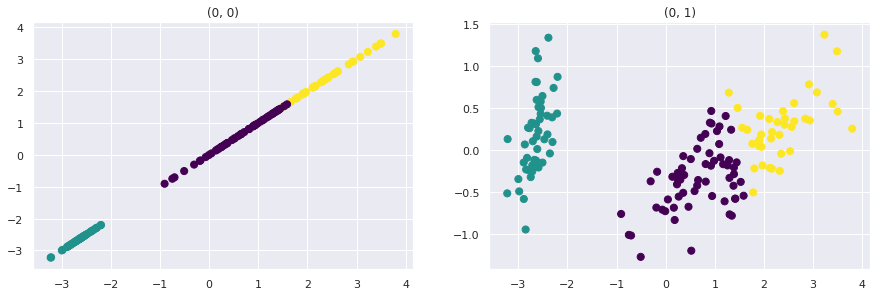

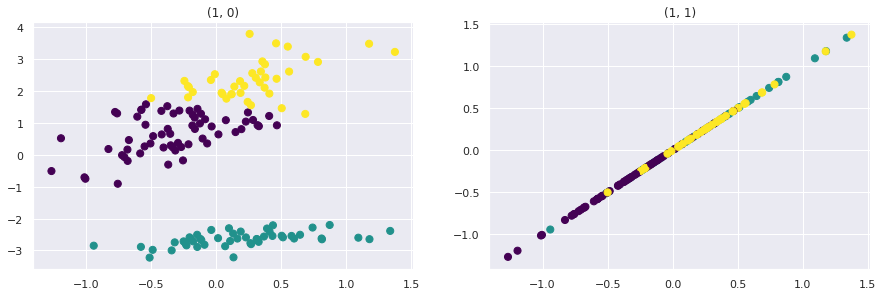

In [313]:
visualisationData(X, y_kmeans, 2)

### - Plot the centroids

In [337]:
def visualisationCentroid(centroid, n, couleur):
    for i in range(n):
        compteur = 1
        plt.figure(figsize=(15,10))
        for j in range(n):
            titre = i, j
            plt.subplot(n, n, compteur)
            plt.title(titre)
            plt.scatter(centroid[:, i], centroid[:, j], c=couleur, s=200, alpha=0.9)            
            compteur=compteur+1

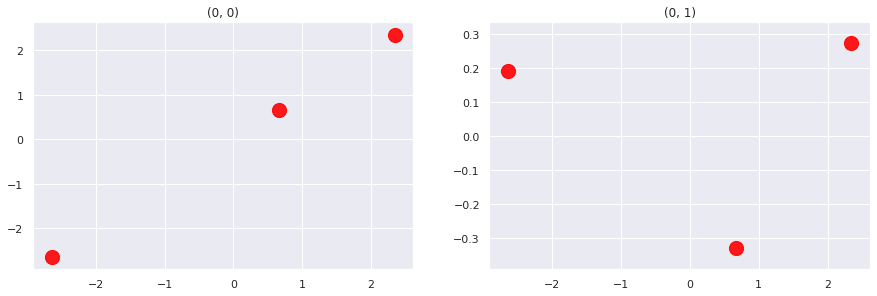

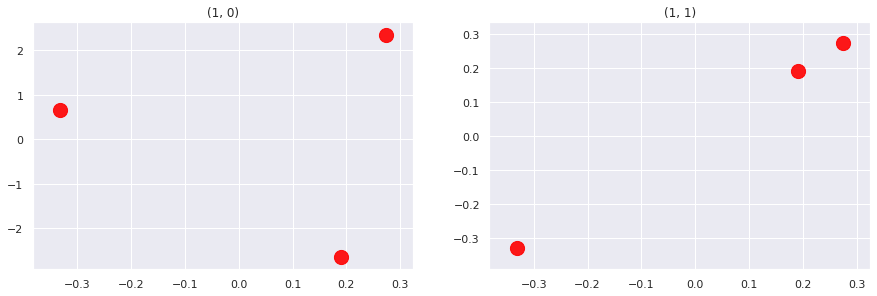

In [315]:
centers = kmeans.cluster_centers_
visualisationCentroid(centers, 2, 'red')

In [316]:
def visualisationDataCentroides(data, label, centroid, n, couleur):
    for i in range(n):
        compteur = 1
        plt.figure(figsize=(15,10))
        for j in range(n):
            titre = i, j
            plt.subplot(n, n, compteur)
            plt.title(titre)
            plt.scatter(data[:,i], data[:,j],  c=label, s=50, cmap='viridis')
            plt.scatter(centroid[:, i], centroid[:, j], c=couleur, s=200, alpha=0.9)
            compteur=compteur+1

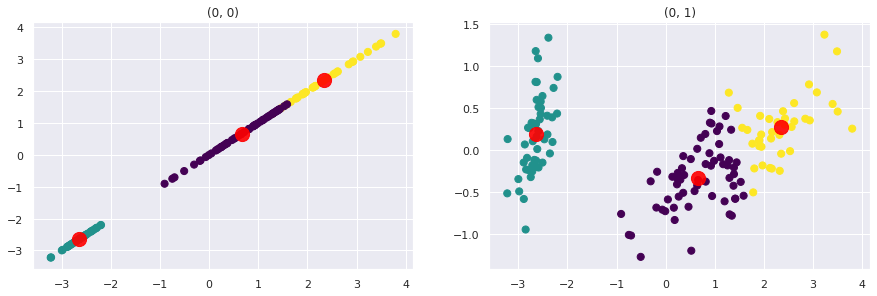

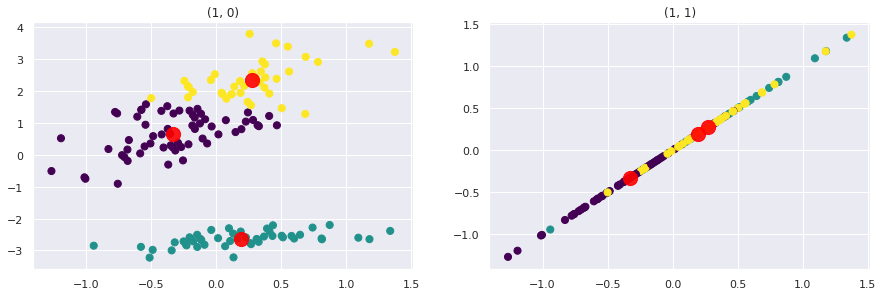

In [317]:
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
visualisationDataCentroides(X, y_kmeans, centers, 2, 'red')

### 4. Repetitions de la question de la question 3

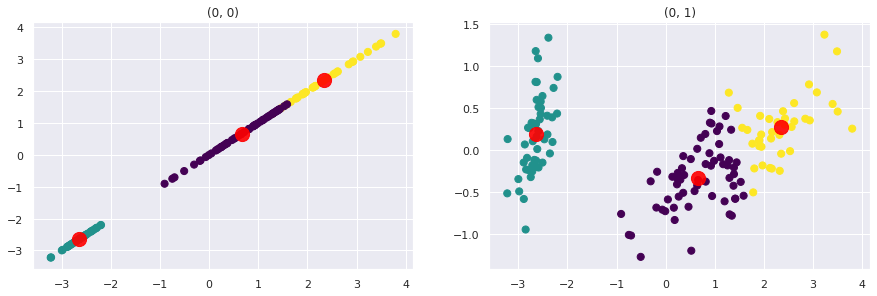

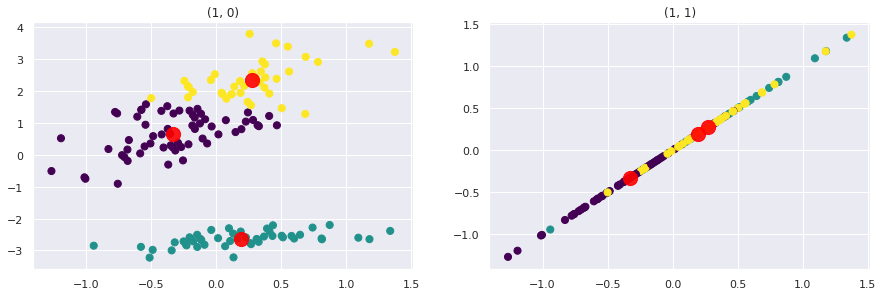

In [318]:
### Repetition 1
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
visualisationDataCentroides(X, y_kmeans, centers, 2, 'red')

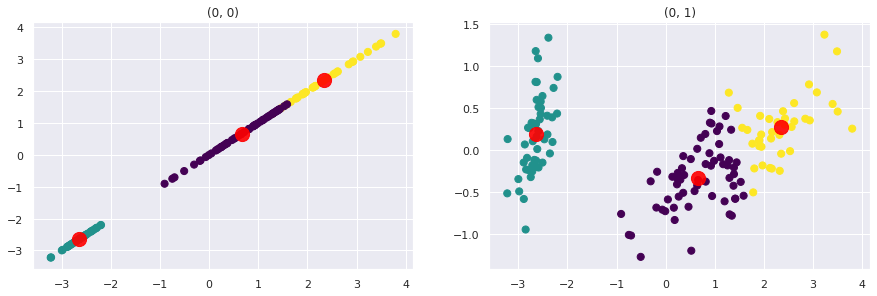

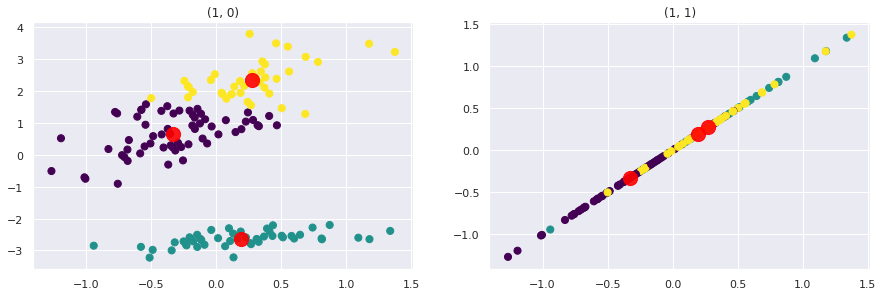

In [319]:
### Répétition 2
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
visualisationDataCentroides(X, y_kmeans, centers, 2, 'red')

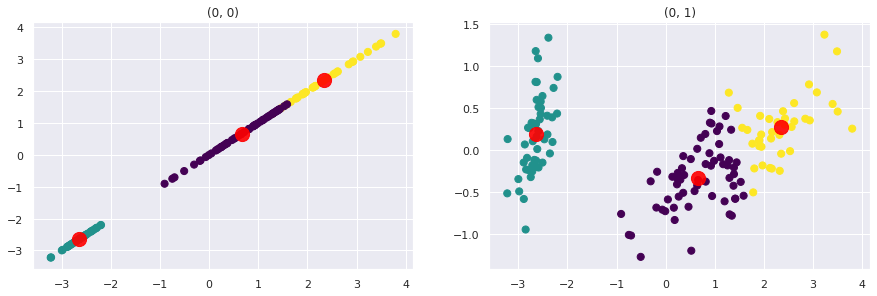

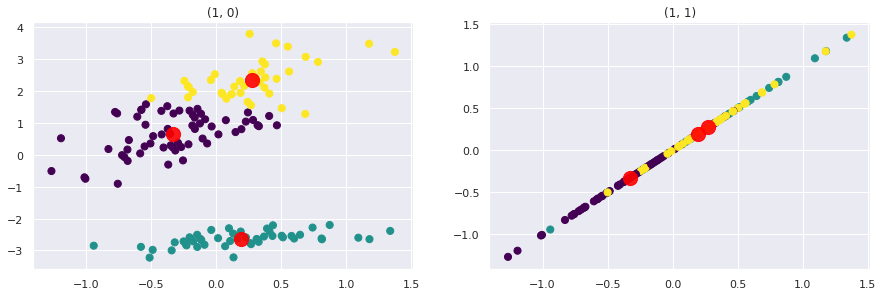

In [320]:
### Répétition 3
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
visualisationDataCentroides(X, y_kmeans, centers, 2, 'red')

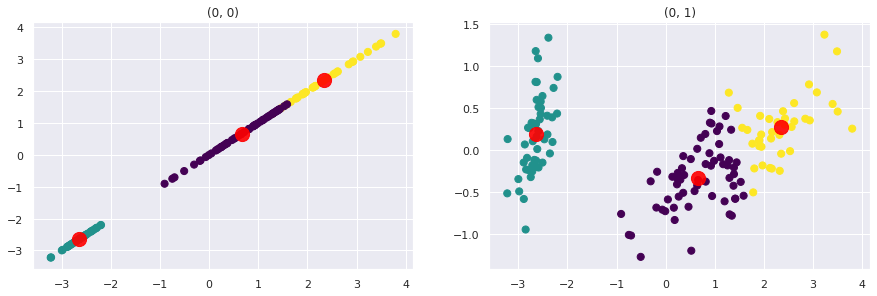

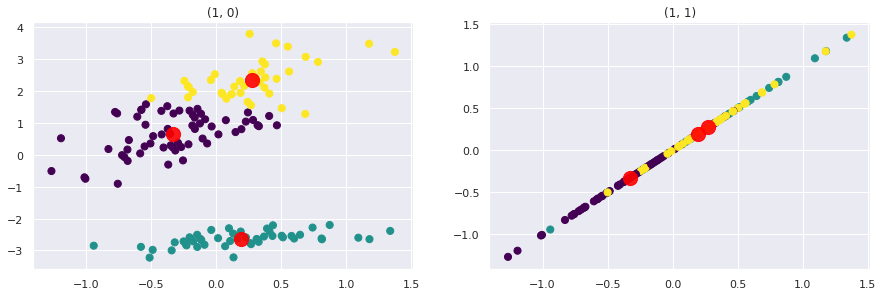

In [321]:
### Répétition 4
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
visualisationDataCentroides(X, y_kmeans, centers, 2, 'red')

#### Constat

Nous constatons que les coordonnées des centroides ne changent pas, les données sont regroupés en fonction des couleurs. Il y a comme une délimitation virtuelle de ces groupes de données. Un point d'un groupe ne peut se retrouver dans un autre groupe. A chaque répétition, les clusters ne changent pas de position comme si ce sont des positions prédéfinies.

### 5. Use the command plot(· · ·) to project the labels that you stored in a separate vector in question 2). Compare these results with the partitions from your K-Means experiments. Comment.

In [322]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

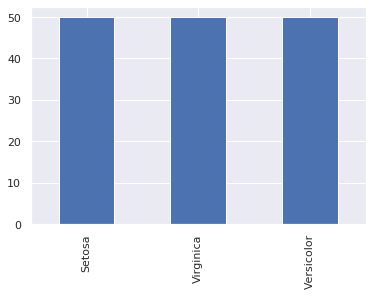

In [323]:
espece.value_counts().plot(kind='bar')
plt.show()

In [305]:
# on convertit un tableau numpy en dataframe
#y_kmeans = pd.DataFrame(data=y_kmeans)

#### - Compare theorical target with the partitions from your K-Means experiments. Comment.

In [324]:
# on convertit la liste catégorielle en entier afin de les comparer avec les  labels k_means
cleEspece = []
for i in espece:
    if i == 'Setosa':
        cleEspece.append(0)
    elif i == 'Virginica':
        cleEspece.append(1)
    elif i == 'Versicolor':
        cleEspece.append(2)
cleEspece=np.array(cleEspece)
cleEspece

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [325]:
# Comparaison des labels théoriques aux labels kmean
y_kmeans == cleEspece

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

De cette comparaison, on en déduit, que les labels kmeans sont différents des labels théoriques.

### 6. Use the command table to prompt the contingency table comparing your results with the theoretical labels. Comment.

In [328]:
# création de la table de contingence
tableContingence = pd.crosstab(y_kmeans, espece)
tableContingence

variety,Setosa,Versicolor,Virginica
row_0,,,
0,0,47,14
1,50,0,0
2,0,3,36


l'analyse de ce tableau nous permet de dire que :
- il 50 espèces de type ***setosa*** correspondants au label 1 dans les données kmean
- il 47 espèces de type ***Versicolor*** correspondants au label 0 et 3 correspondants à 2
- il y a 14 espèces de type ***Virginica*** correspondants au label 1 et 36 correspondants à 2

Vu le nombre d'occurences, on en déduit que :
- Setosa = 1
- Versicolor = 0
- Virginica = 2

les occurences minimes des espèces Versicolor et Virginica qui se retrouvent en 2 lignes en meme temps correspond aux valeurs aberrantes de ces dernières.

### 7. Choose a solution that seems good enough for you and compute the silhouette index. Comment.

La solution qui semble assez bonne pour moi c'est celle des labels kmeans.

In [331]:
silhouette_avg = silhouette_score(X, y_kmeans)
silhouette_avg

0.597676421954799

Comme la valeur de la silhouette est de 0.6, on peut en déduire que les points sont pas bien affectés aux clusters

### 8. Start again questions 3) to 7) using the original data (“data") instead of the projected ones. How different are the results ? Explain the pros and cons of using the projected data or the original ones.

In [332]:
# Use the K-Means algorithm on your data iris to obtain a partition with 3 clusters
kmeans_iris = KMeans(n_clusters=3)
kmeans_iris.fit(iris)
y_kmean_iris = kmeans_iris.predict(iris)
y_kmean_iris

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [336]:
y_kmean_iris.shape

(150,)

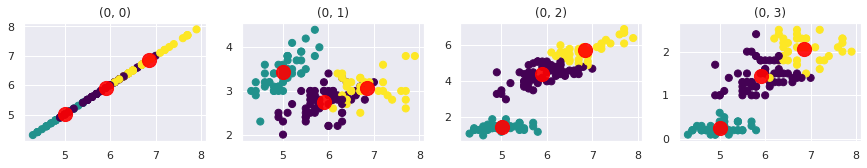

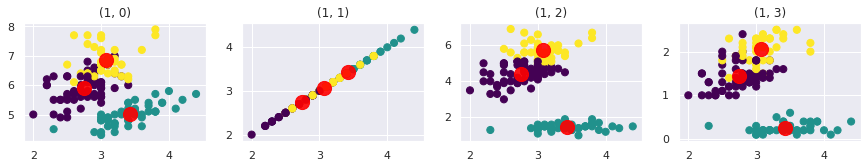

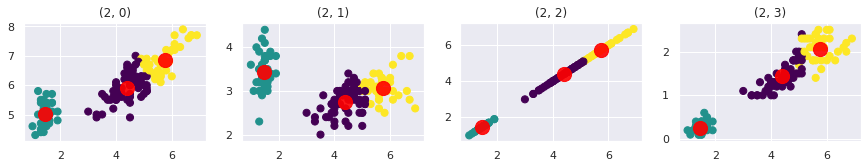

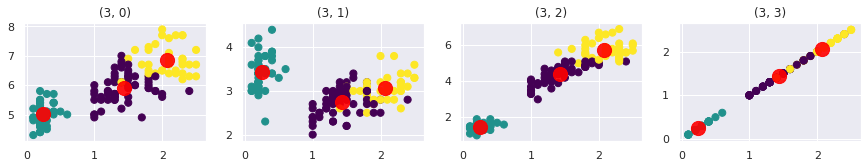

In [339]:
cents = kmeans_iris.cluster_centers_
visualisationDataCentroides(iris.values, y_kmean_iris, cents, 4, 'red')

In [340]:
# création de la table de contingence
tableConting = pd.crosstab(y_kmean_iris, espece)
tableConting

variety,Setosa,Versicolor,Virginica
row_0,,,
0,0,48,14
1,50,0,0
2,0,2,36


l'analyse de ce tableau nous permet de dire que :
- il 50 espèces de type ***setosa*** correspondants au label 1 dans les données kmean
- il 48 espèces de type ***Versicolor*** correspondants au label 0 et 2 correspondants à 2
- il y a 14 espèces de type ***Virginica*** correspondants au label 0 et 36 correspondants à 2

Vu le nombre d'occurences, on en déduit que :
- Setosa = 1
- Versicolor = 0
- Virginica = 2

les occurences minimes des espèces Versicolor et Virginica qui se retrouvent en 2 lignes en meme temps correspond aux valeurs aberrantes de ces dernières.

In [341]:
# Calcul de la silhouette
silhouette_iris = silhouette_score(iris, y_kmean_iris)
silhouette_iris

0.5528190123564102

#### - How different are the results

La différence majeure entre l'application de l'algorithme K-means sur les données projetées d'une part et sur les données originales de l'autre c'est que dans le premier cas, les données sont bien regroupées en partition (clusters). En revanche dans le second cas, il y a certaines données que se confondent à d'autres, ce qui traduit un mauvais partitionnement.

#### - Pros and Cons of using the projected data or the original ones

- L'avantage d'utilisation des données projetées c'est qu'on travaille uniquement sur les données les plus pertinentes; ce qui facilite l'application de l'algorithme k-means sur ces données. Mais cette réduction de la dimensionalité a un inconvénient car elle peut nous faire perdre certaines informations, c'est pourquoi on constate qu'il y a seulelent 47 espèces Versicolor sur 50, tout comme il y a 36 espèces Virginica; ce qui nous permet d'en déduire que l'analyse en composante principale a comme défaut d'être affecté par les données aberrantes
- D'autre part, avec les données originales, le résultat est encore pire car il est difficile d'effectuer un traitement ou une analyse sur une très grande quantité de données.

# B. Optimal cluster number in exoplanet data

### 1. Open the file exo4_atm_extr.csv and remove the last column containing the labels.

In [342]:
planet = pd.read_csv(filename2, sep=";", header=0) #lecture de table sans header
planet.head()

,PH2O,PHe,PCH4,PH2,PN2,PNH3,PO2,PAr,PCO2,PSO2,PK,Type
0,0.0,8.7,1.3,87.30,0.0,2.70,0.0,0.0,0.0,0.0,0.00,g
1,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.02,r
2,0.1,7.1,1.7,86.45,0.0,1.15,0.0,0.0,0.0,3.5,0.00,g
3,0.0,2.7,0.0,3.70,41.5,0.00,31.3,6.6,14.2,0.0,0.00,i
4,0.1,11.4,1.1,86.10,0.0,0.20,0.0,0.0,0.0,1.1,0.00,g


In [343]:
# On affiche les noms de toutes les colonnes
planet.columns

Index(['PH2O', 'PHe', 'PCH4', 'PH2', 'PN2', 'PNH3', 'PO2', 'PAr', 'PCO2',
       'PSO2', 'PK', 'Type'],
      dtype='object')

In [344]:
# je stocke les labels dans une variable labels
labels = planet["Type"]
labels.head()

0    g
1    r
2    g
3    i
4    g
Name: Type, dtype: object

In [346]:
# on supprime la colonne des labels
del planet["Type"]

In [347]:
# nouvelle table exo4
planet.head()

,PH2O,PHe,PCH4,PH2,PN2,PNH3,PO2,PAr,PCO2,PSO2,PK
0,0.0,8.7,1.3,87.30,0.0,2.70,0.0,0.0,0.0,0.0,0.00
1,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.02
2,0.1,7.1,1.7,86.45,0.0,1.15,0.0,0.0,0.0,3.5,0.00
3,0.0,2.7,0.0,3.70,41.5,0.00,31.3,6.6,14.2,0.0,0.00
4,0.1,11.4,1.1,86.10,0.0,0.20,0.0,0.0,0.0,1.1,0.00


### 2. Write down the different properties of the Davies-Bouldin index.

- une valeur inférieure de l'index de Davies-Bouldin signifie un meilleur clustering
- L'indice DB n'est pas normalisé
- Cet indice favorise les clusters de forme sphériques
- cet indice est biaisé de sorte qu'il donne des valeurs plus basses avec moins de cluster

### 3. Using exercice A and the course, propose a method that can help guessing the right number of clusters in this dataset based on the Davies-Bouldin index and the K-Means algorithm.

#### - Méthode

J'ai choisi de créer une fonction qui teste plusieurs valeurs de k entre 2 et 10 en l'appliquant sur l'algorithme K-means. L'idée est de calculer par la suite l'index de Davies-Boudin. La valeur de k pour laquelle l'index sera la plus petite va correspondre au meilleur choix de k.

In [225]:
# création de la fonction qui renvoie le meilleur indice
def indexMinimal(tab):
    k = [2, 3, 4, 5, 6, 7, 8, 9]
    list_db = {}
    scores =[]
    for i in k:
        kmeans_tab = KMeans(n_clusters=i)
        kmeans_tab.fit(tab)
        y_kmean_tab = kmeans_tab.predict(tab)
        db = davies_bouldin_score(planet.values, y_kmean_tab)
        scores.append(db)
        list_db[i] = db
        print("Pour k = ", i, "pd = ",db)
    
    #Graphe
    plt.plot(k, scores, 'o-')
    plt.title('Graphe des cluster par rapport aux indices DB')
    plt.xlabel('cluster')
    plt.ylabel('indices davies-bouldin')
    plt.show()
    
    #minimum
    minK = min(list_db, key=list_db.get)
    return (minK, list_db[minK], kmeans_tab, y_kmean_tab)

Pour k =  2 pd =  0.5190792350544102
Pour k =  3 pd =  0.3172965483768289
Pour k =  4 pd =  0.27986366882581964
Pour k =  5 pd =  0.5402758234735353
Pour k =  6 pd =  0.5096435665890936
Pour k =  7 pd =  0.4851089500458522
Pour k =  8 pd =  0.5812574044294887
Pour k =  9 pd =  0.5756342382800698


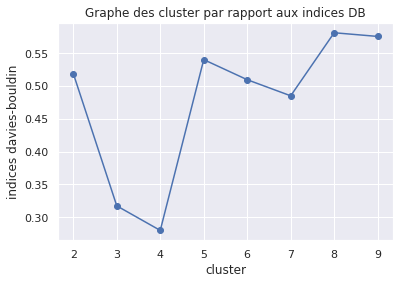

Le meilleur k est  4  pour un index de Davies-Bouldin de  0.27986366882581964


In [226]:
# On récupère le meilleur k
k, db, kmeans_planet, y_kmean_planet = indexMinimal(planet)
print("Le meilleur k est ",k," pour un index de Davies-Bouldin de ",db)

### 4. Comment yours results. You can use PCA and the real labels in your explanations.

### - Avec les labels kmean

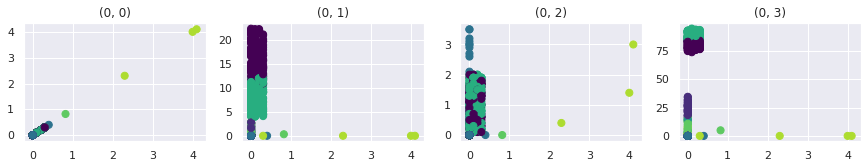

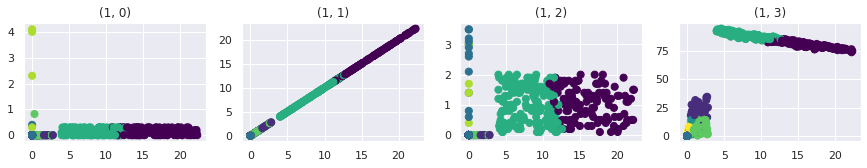

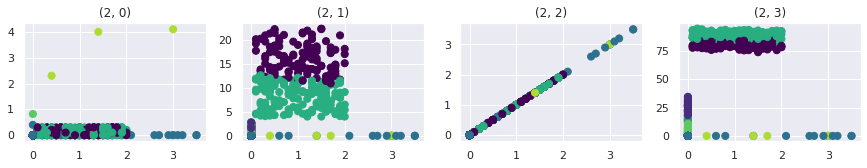

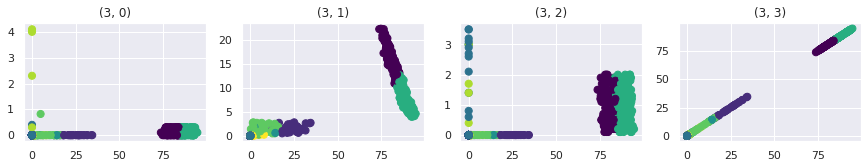

In [398]:
# Avec les données initiales
kmeans_p = kmeans_planet 
y_pred = y_kmean_planet
centers = kmeans_p.cluster_centers_
visualisationData(planet.values, y_pred, 4) # Je visualise seulement les 4 premières variables

Sur une vue générale, nous constatons déjà que les données ne sont pas bien partitionnées. Certaines données d'un cluster donné se confondent à des données des autres clusters. Ce qui n'est pas le fonctionnement idéal.

On va le voir de plus prêt en affichant uniquement quelques les données des colonnes (1 et 2) puis des colonnes (2, 1)

#### - Visualisation des colonnes Phe et PCH4

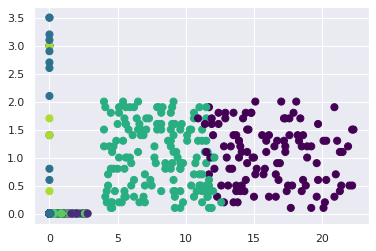

In [409]:
plt.scatter(planet.values[:,1], planet.values[:,2],  c=y_pred, s=50, cmap='viridis')
#cent = kmeans_p.cluster_centers_
#plt.scatter(cent[:, 1], cent[:, 2], c='red', s=200, alpha=0.9)

#### - Visualisation des colonnes PCH4 et Phe

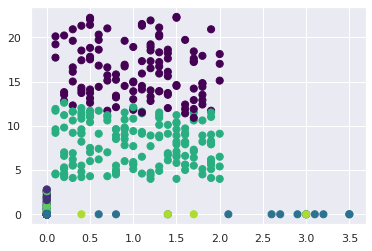

In [410]:
plt.scatter(planet.values[:,2], planet.values[:,1],  c=y_pred, s=50, cmap='viridis')
#cent = kmeans_p.cluster_centers_
#plt.scatter(cent[:, 2], cent[:, 1], c='red', s=200, alpha=0.9)

ces 2 visualisations viennent confirmer le précédent constat avec l'ensemble des données car on voit bien que les données ne s'adaptent pas bien dans les clusters

### - Avec les labels théoriques

In [403]:
# Préparation des données théoriques numériques
lab = np.array(labels) # on convertit les données en tableau numpy
lab = lab.reshape(-1,1) # on redimensionne les données en 2D pour pouvoir appliquer la fonction encoder
# transformation des données textuelles en données numériques
encoder = OrdinalEncoder()
encoder.fit(lab)
lab_encoded = encoder.transform(lab)
lab_encoded = lab_encoded.reshape(1, -1) # on redimensionne à nouveau les données pour les récupérer en 1D

Comme les colonnes (1, 2) et (2, 1) nous donnent une bonne interprétation des graphes, nous allons de nouveau
tester les labels théoriques sur ces derniers

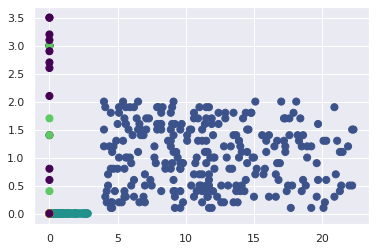

In [407]:
plt.scatter(planet.values[:,1], planet.values[:,2],  c=lab_encoded[0], s=50, cmap='viridis')
#cent = kmeans_p.cluster_centers_
#plt.scatter(cent[:, 1], cent[:, 2], c='red', s=200, alpha=0.9)

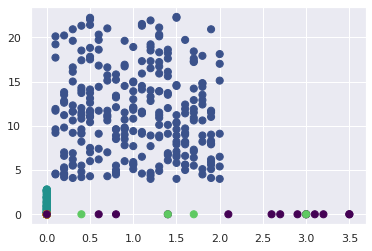

In [408]:
plt.scatter(planet.values[:,2], planet.values[:,1],  c=lab_encoded[0], s=50, cmap='viridis')

A vue d'oeil, le test sur les données initiales en utilisant les labels réels nous permettent de distinguer que 3 groupes de points quoique les données sont moins confondues entre elles.

### - On va à présent appliquer Kmean sur les données projetées par PCA

In [411]:
# Application de la pca sur la table planet
# Après avoir essayer avec plusieurs composants, on a obtenu des meilleurs résultats avec 2 composants
pca = decomposition.PCA(n_components=2)
pca.fit(planet)
X2 = pca.transform(planet)

In [412]:
X2.shape

(1000, 2)

In [413]:
# Utilisation de la pca sur les données projetées
k = 4
kmeans_ = KMeans(n_clusters=k)
kmeans_.fit(X2)
y_kmean_ = kmeans_.predict(X2)

#### Visualisation des données sur les labels KMean

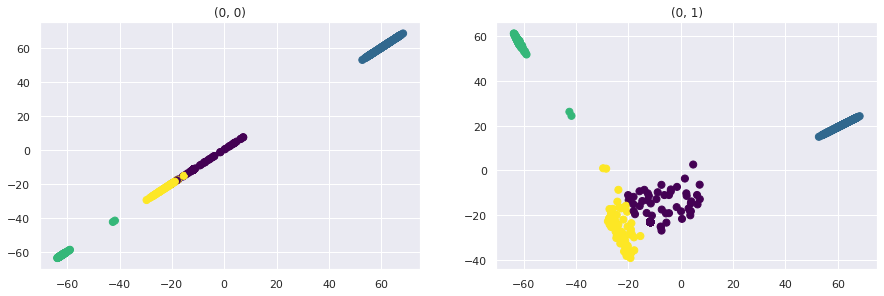

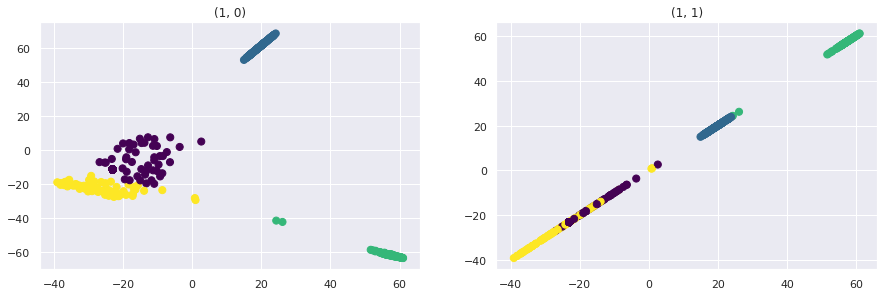

In [415]:
visualisationData(X2, y_kmean_, 2)

On affiche uniquement (1, 0) et (0, 1)

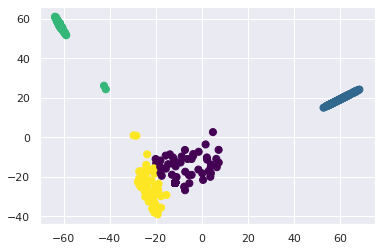

In [417]:
plt.scatter(X2[:,0], X2[:,1],  c=y_kmean_, s=50, cmap='viridis')

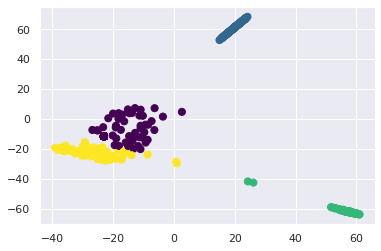

In [418]:
plt.scatter(X2[:,1], X2[:,0],  c=y_kmean_, s=50, cmap='viridis')

On constate que les données sont plus dense et bien partionné.

#### Visualisation des données sur les labels réels

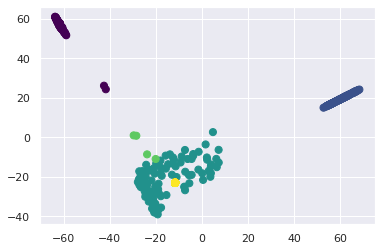

In [420]:
plt.scatter(X2[:,0], X2[:,1],  c=lab_encoded[0], s=50, cmap='viridis')

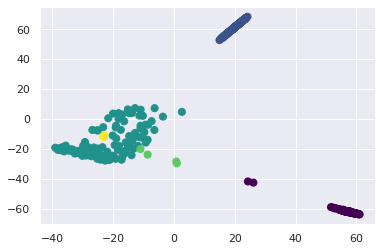

In [421]:
plt.scatter(X2[:,1], X2[:,0],  c=lab_encoded[0], s=50, cmap='viridis')

On constate avec les labels théoriques que les données sont, certes denses, mais elles ne sont pas bien partionnées